In [1]:
# Set project root
import os
import sys

# Manually set the path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import numpy as np

from src.test_calibration import SyntheticDataGenerator, Analyzer, Plotter

In [3]:
K_gt = np.array([
    [1000, 0, 480],
    [0, 1000, 640],
    [0, 0, 1]
])

n_homographies = 3
n_trials = 1000

noise_levels = np.arange(0, 0.021, 0.002)

seed = 0

In [4]:
generator = SyntheticDataGenerator(K_gt)

In [5]:
data = generator.generate_dataset(
    n_homographies=n_homographies,
    max_rotation=20,
    random_seed=seed
)


SYNTHETIC DATASET SUMMARY
Number of homographies: 3
Camera focal length: 1000.0
Principal point: (480.0, 640.0)
Scene Statistics
	Distance range: 1.39 - 1.85 m
	Mean distance: 1.65 ± 0.19 m
	Viewing angle range: 9.5° - 24.1°
	Mean viewing angle: 19.2° ± 6.8°

Clean Homography Statistics
	Element magnitude range: [0.0290, 839.5719]
	Mean element magnitude: 346.1970

Dataset ready for analysis!


In [6]:
analyzer = Analyzer(data, n_trials, noise_levels)

Analyzer initialized:
	Dataset: 3 homographies
	Trials per level: 1000
	Noise levels: [0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02 ]
	Image size: (960, 1280)


In [7]:
results = analyzer.run_all_analyses()

RUNNING ANALYSIS

Processing noise level σ = 0.000 (1/11)
----------------------------------------


	Calibration: f = 1000.0 ± 0.0 (error: 0.00%, success: 100.0%)
	Pixel errors: RMSE = 0.00px (1200000 measurements)

Processing noise level σ = 0.002 (2/11)
----------------------------------------
	Calibration: f = 1000.9 ± 31.0 (error: 0.09%, success: 100.0%)
	Pixel errors: RMSE = 0.22px (1200000 measurements)

Processing noise level σ = 0.004 (3/11)
----------------------------------------
	Calibration: f = 1004.1 ± 61.5 (error: 0.41%, success: 100.0%)
	Pixel errors: RMSE = 0.45px (1200000 measurements)

Processing noise level σ = 0.006 (4/11)
----------------------------------------
	Calibration: f = 1001.7 ± 91.5 (error: 0.17%, success: 100.0%)
	Pixel errors: RMSE = 0.68px (1200000 measurements)

Processing noise level σ = 0.008 (5/11)
----------------------------------------
	Calibration: f = 1018.0 ± 128.5 (error: 1.80%, success: 100.0%)
	Pixel errors: RMSE = 0.91px (1200000 measurements)

Processing noise level σ = 0.010 (6/11)
----------------------------------------
	Calibrati

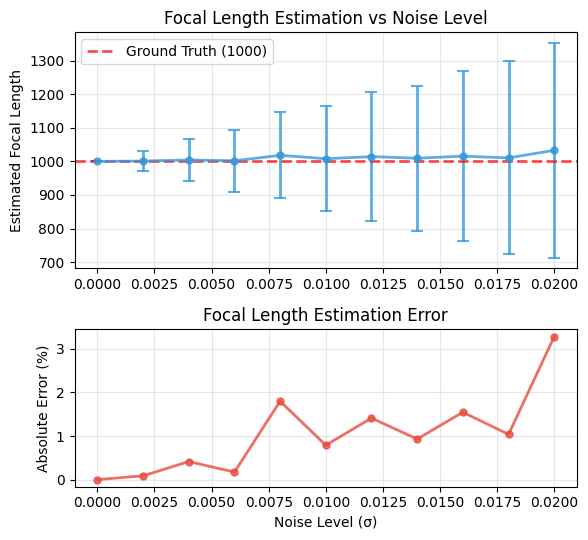

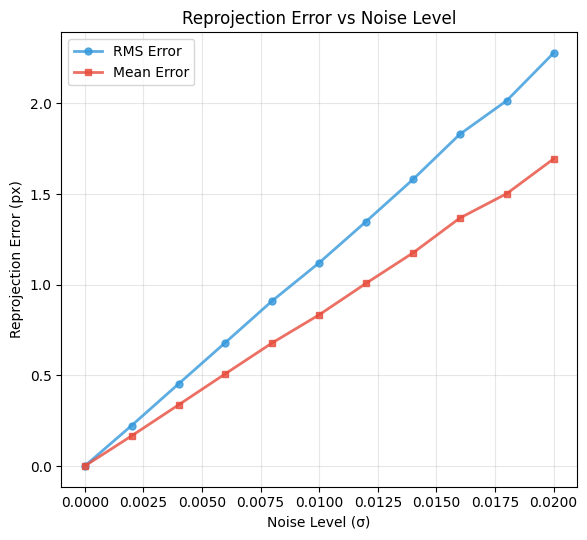

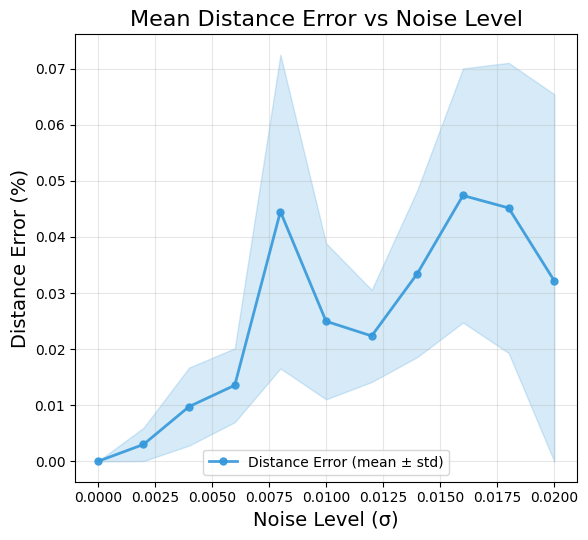

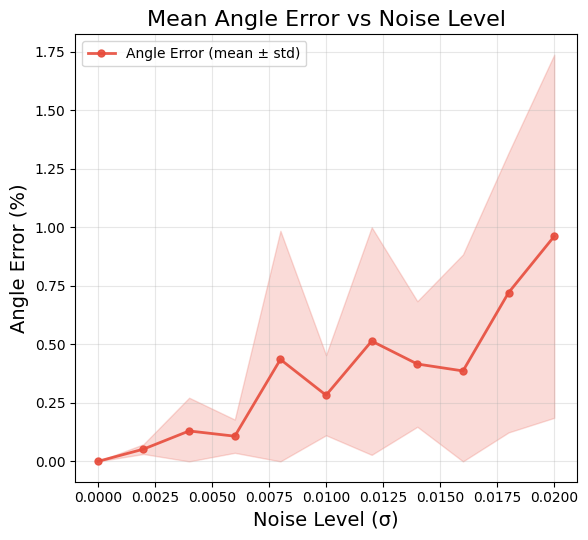

In [8]:
plotter = Plotter(data, results)
plotter.plot_all()
plotter.export_figures()